In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'C059'

customers_df = pd.read_csv('dataset/Customers.csv')
products_df = pd.read_csv('dataset/Products.csv')
transactions_df = pd.read_csv('dataset/Transactions.csv')

In [10]:
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

missing_values = {
    "Customers Missing": customers_df.isnull().sum(),
    "Products Missing": products_df.isnull().sum(),
    "Transactions Missing": transactions_df.isnull().sum(),
}


merged_df = transactions_df.merge(customers_df, on='CustomerID').merge(products_df, on='ProductID')
merged_df = merged_df.rename(columns={'Price_y': 'ProductPrice', 'Price_x': 'TransactionPrice'})
merged_df = merged_df.drop(columns=['TransactionPrice'])
merged_df['Revenue'] = merged_df['Quantity'] * merged_df['ProductPrice']

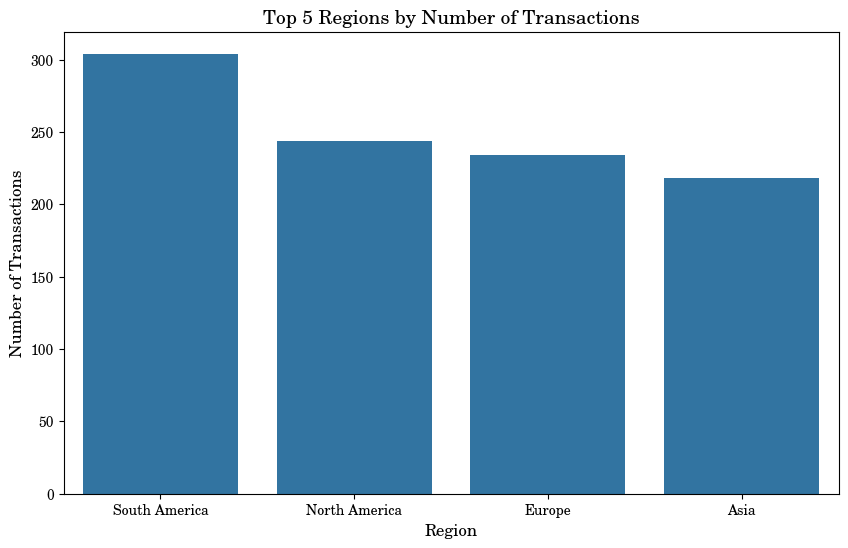

In [11]:
# Visualization 1: Top 5 regions by number of transactions
region_transaction_counts = merged_df['Region'].value_counts().head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=region_transaction_counts.index, y=region_transaction_counts.values)
plt.title('Top 5 Regions by Number of Transactions', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.show()

/tmp/ipykernel_96399/1788485967.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products_revenue.values, y=top_products_revenue.index, orient='h', palette='coolwarm')


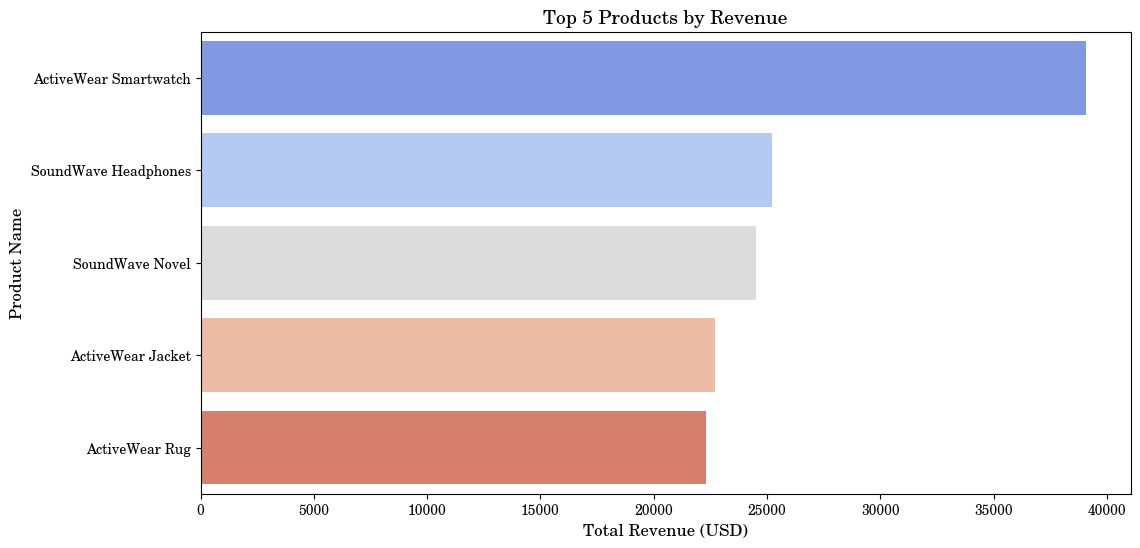

In [12]:
# Visualization 2: Top 5 products by revenue
top_products_revenue = merged_df.groupby('ProductName')['Revenue'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products_revenue.values, y=top_products_revenue.index, orient='h', palette='coolwarm')
plt.title('Top 5 Products by Revenue', fontsize=14)
plt.xlabel('Total Revenue (USD)', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.show()

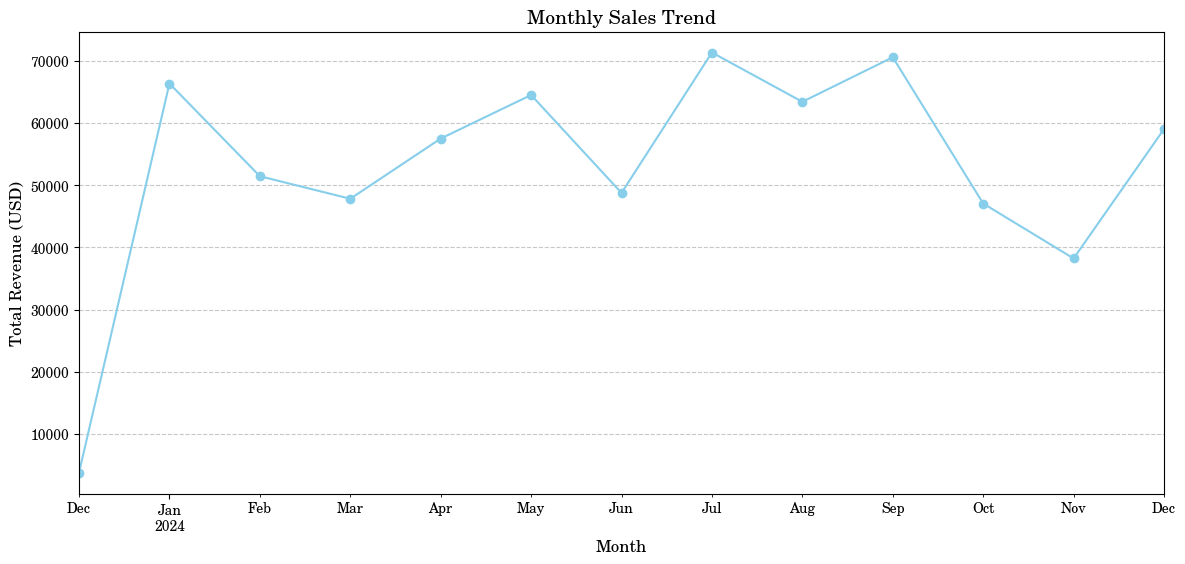

In [13]:
# Visualization 3: Monthly sales trend
merged_df['TransactionMonth'] = merged_df['TransactionDate'].dt.to_period('M')
monthly_sales = merged_df.groupby('TransactionMonth')['Revenue'].sum()
plt.figure(figsize=(14, 6))
monthly_sales.plot(kind='line', marker='o', color='skyblue')
plt.title('Monthly Sales Trend', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue (USD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

/tmp/ipykernel_96399/2734612496.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=signup_year_counts.index, y=signup_year_counts.values, palette='coolwarm')


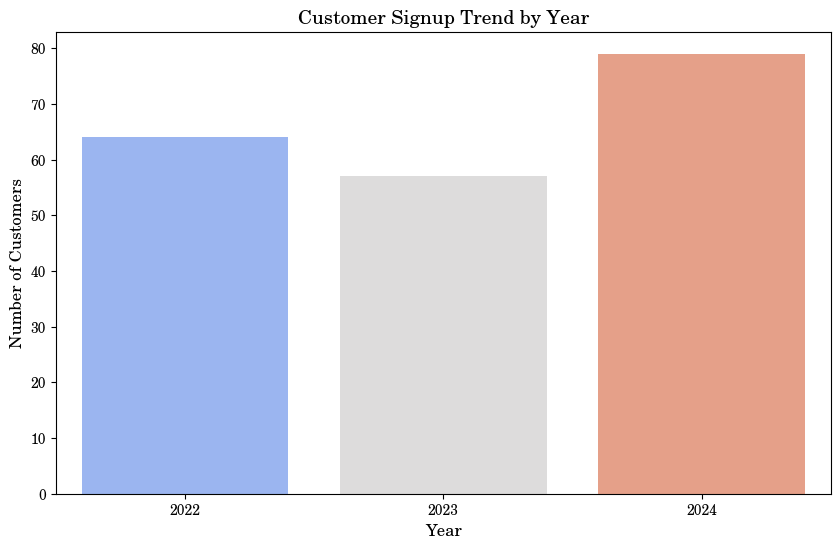

In [14]:
# Visualization 4: Customer signup trend by year
customers_df['SignupYear'] = customers_df['SignupDate'].dt.year
signup_year_counts = customers_df['SignupYear'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=signup_year_counts.index, y=signup_year_counts.values, palette='coolwarm')
plt.title('Customer Signup Trend by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.show()

/tmp/ipykernel_96399/1468435297.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_transaction_by_region.values, y=avg_transaction_by_region.index, palette='viridis', orient='h')


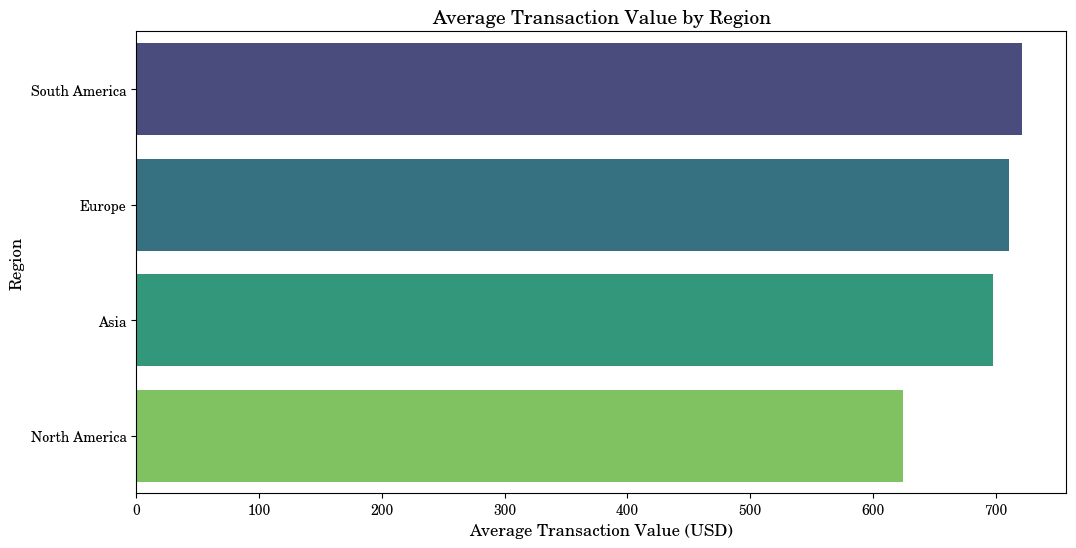

Missing Values: {'Customers Missing': CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64, 'Products Missing': ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64, 'Transactions Missing': TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64}


In [15]:
# Visualization 5: Average transaction value per region
avg_transaction_by_region = merged_df.groupby('Region')['Revenue'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_transaction_by_region.values, y=avg_transaction_by_region.index, palette='viridis', orient='h')
plt.title('Average Transaction Value by Region', fontsize=14)
plt.xlabel('Average Transaction Value (USD)', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.show()

# Print missing values for report
print("Missing Values:", missing_values)